Accuracy: 1.0
Confusion Matrix:
 [[100   0]
 [  0 100]]


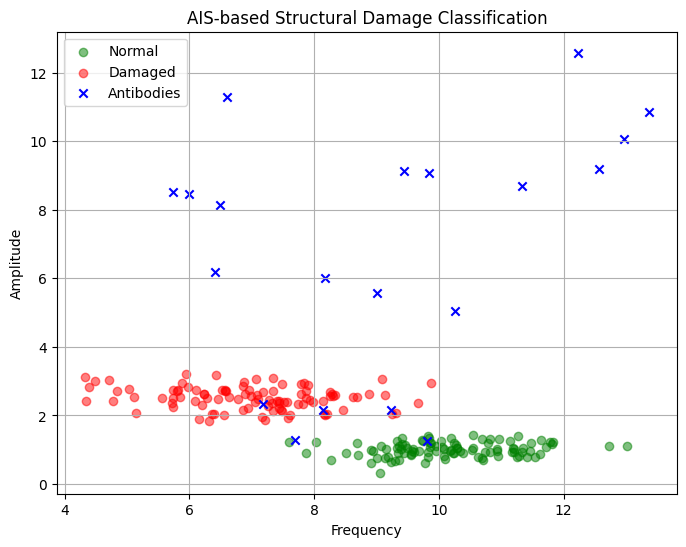

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

# --- Step 1: Simulate structural vibration feature data ---

# Simulate 2D feature space: [frequency, amplitude]
def generate_data(n_samples, label):
    if label == 0:  # Normal
        return np.random.normal(loc=[10, 1], scale=[1.0, 0.2], size=(n_samples, 2)), [0]*n_samples
    else:  # Damaged
        return np.random.normal(loc=[7, 2.5], scale=[1.2, 0.3], size=(n_samples, 2)), [1]*n_samples

X1, y1 = generate_data(100, 0)
X2, y2 = generate_data(100, 1)

X = np.vstack((X1, X2))
y = np.array(y1 + y2)

# --- Step 2: Initialize antibodies (random detectors) ---
n_antibodies = 20
antibodies = np.random.uniform(low=5, high=15, size=(n_antibodies, 2))  # Random feature values
labels = np.random.randint(0, 2, size=n_antibodies)  # Random class guess

# --- Step 3: Clonal Selection Algorithm ---
def affinity(a, x):
    return -np.linalg.norm(a - x)  # Negative Euclidean distance

def mutate(antibody, rate=0.1):
    return antibody + np.random.normal(scale=rate, size=antibody.shape)

def classify(x, antibodies, labels):
    affinities = [affinity(a, x) for a in antibodies]
    idx = np.argmax(affinities)
    return labels[idx]

# Training phase
for epoch in range(20):
    for i, x in enumerate(X):
        pred = classify(x, antibodies, labels)
        if pred != y[i]:
            # Select best antibody and clone
            affinities = [affinity(a, x) for a in antibodies]
            idx = np.argmin(affinities)  # Worst matching antibody
            # Replace with a mutated version of x
            antibodies[idx] = mutate(x)
            labels[idx] = y[i]

# --- Step 4: Classification and Evaluation ---
y_pred = [classify(x, antibodies, labels) for x in X]

acc = accuracy_score(y, y_pred)
cm = confusion_matrix(y, y_pred)

print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)

# --- Step 5: Visualization ---
plt.figure(figsize=(8, 6))
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], c='green', label='Normal', alpha=0.5)
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], c='red', label='Damaged', alpha=0.5)
plt.scatter(antibodies[:, 0], antibodies[:, 1], c='blue', label='Antibodies', marker='x')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('AIS-based Structural Damage Classification')
plt.legend()
plt.grid(True)
plt.show()
